#  1.0 Insurance All

Disclaimer: O Contexto a seguir, é completamente fictício, a empresa, o contexto, o CEO, as perguntas de negócio existem somente na cabeça do [Meigarom](https://www.instagram.com/meigarom.datascience/), criador da Comunidade DS, idealizador do blog [Seja um Data Scientist](https://sejaumdatascientist.com/). 

A Insurance All é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, um novo produto: Um seguro de automóveis.

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma pesquisa com cerca de 380 mil clientes sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou 127 mil novos clientes que não responderam a pesquisa para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.

Contudo, o time de vendas tem uma capacidade de realizar 20 mil ligações dentro do período da campanha.

# 2.0 O Desafio

Construir um modelo que prediz se o cliente estaria ou não interessado no seguro de automóvel. 

O time de vendas espera conseguir priorizar as pessoas com maior interesse no novo produto e assim, otimizar a campanha realizando apenas contatos aos clientes mais propensos a realizar a compra.

Entregar um relatório contendo algumas análises e respostas às seguintes perguntas:

- Principais Insights sobre os atributos mais relevantes de clientes interessados em adquirir um seguro de automóvel.
- Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?
- E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?
- Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

# 3.0 Os Dados

O conjunto de dados está disponível na plataforma do Kaggle, através desse link: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction 

Cada linha representa um cliente e cada coluna contém alguns atributos que descrevem esse cliente, além da sua resposta à pesquisa, na qual ela mencionou interesse ou não ao novo produto de seguros. 

O conjunto de dados inclui as seguintes informações:

- Id: identificador único do cliente.
- Gender: gênero do cliente.
- Age: idade do cliente.
- Driving License: 0, o cliente não tem permissão para dirigir e 1, o cliente tem para dirigir ( CNH – Carteira Nacional de Habilitação )
- Region Code: código da região do cliente.
- Previously Insured: 0, o cliente não tem seguro de automóvel e 1, o cliente já tem seguro de automóvel.
- Vehicle Age: idade do veículo.
- Vehicle Damage: 0, cliente nunca teve seu veículo danificado no passado e 1, cliente já teve seu veículo danificado no passado.
- Anual Premium: quantidade que o cliente pagou à empresa pelo seguro de saúde anual.
- Policy sales channel: código anônimo para o canal de contato com o cliente.
- Vintage: número de dias que o cliente se associou à empresa através da compra do seguro de saúde.
- Response: 0, o cliente não tem interesse e 1, o cliente tem interesse.

# 4.0 Funções Auxiliares

In [1]:
# tabela de proporção entre duas variáveis
def cross_prop_tab(data, var1, var2):
    return round(100 * pd.crosstab(data[var1], data[var2]).apply(lambda x: x/sum(x), axis = 1), 2)

# plot confusion matrix
def con_mtx(clf, clf_name, x, y):
    plot_confusion_matrix(clf, x, y)
    plt.title(clf_name)
    plt.show()

# treinamento com cross validation e plot dos resultados
def model_choice(models, x_train, x_test, y_train, y_test):
    
    # lista para gravar os resultados
    #results    = []
    #model_name = []
    #avg_ds     = []
    
    # separação do dataset e k-folds (cross-validation)
    #kfold = KFold(n_splits = 5, shuffle = True, random_state = 123)
    
    # treinamento do modelo e gravação dos resultados no dataframe
    for name, model in models:
        clf  = model.fit(x_train, y_train)
        pred = clf.predict(x_test) 
        print('\n{} - Classification Report:\n'.format(name))
        print(classification_report(y_test, pred))
        #acc = cross_val_score(model, predictors, target, cv = kfold, scoring = 'accuracy', n_jobs = -1)
        #results.append(acc)
        #model_name.append(name)
        #print('{}: {} ({})'.format(name, round(acc.mean(), 4), round(acc.std(), 6)))
    
    # calcular a média das acurácias dos algortimos treinados
    #for i in range(0, len(results)):
        #avg = sum(results[i])/len(results[i])
        #avg_ds.append(avg)
    
    #print('\nAccuracy Average: ',  round((100 * sum(avg_ds)/len(avg_ds)), 2))
    #print('Standard deviation of accuracy:', round(np.std(avg_ds), 3))
    
    # boxplot para comparar os algoritmos
    #fig = plt.figure(figsize = (12,6))
    #fig.suptitle('Algorithms')
    #ax  = fig.add_subplot(111)
    #plt.boxplot(results)
    #ax.set_xticklabels(model_name)
    #plt.show()
    
# plot da AUC
def roc_auc_plot(clf, clf_name, x, y):
    fpr, tpr, _ = roc_curve(y, clf.predict_proba(x)[:, 1])
    roc_auc     = round(auc(fpr, tpr), 5)
    
    plt.title('{} - AUC = {}'.format(clf_name, roc_auc))
    plt.plot(fpr, tpr, 'b')
    plt.plot([0,1], [0,1], 'r--')
    plt.show()

# 5.0 Explorando os Dados

## 5.1 Imports

In [2]:
import pandas as pd
import numpy  as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn           as sns
import squarify

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble     import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC
from xgboost              import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import SMOTE

import pickle

import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

## 5.2 Os Dados

In [3]:
# importando os dados de treino
data = pd.read_csv('train.csv')

# dados de test
test = pd.read_csv('test.csv')

In [4]:
# dados
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.00,0,> 2 Years,Yes,40454.00,26.00,217,1
1,2,Male,76,1,3.00,0,1-2 Year,No,33536.00,26.00,183,0
2,3,Male,47,1,28.00,0,> 2 Years,Yes,38294.00,26.00,27,1
3,4,Male,21,1,11.00,1,< 1 Year,No,28619.00,152.00,203,0
4,5,Female,29,1,41.00,1,< 1 Year,No,27496.00,152.00,39,0


In [5]:
# informações sobre os dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
# missing values
data.isna().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [7]:
# shape dos dados
data.shape

(381109, 12)

- Não temos valores nulos/ausentes para os nossos dados.

- Os tipos de dados presentes no nossa dataset estão entre: int, float e object.

- Temos 381.109 linhas e 12 colunas, sendo que uma dessas colunas contém a variável alvo (Response).

In [8]:
# resumo estatístico
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00
mean,190555.00,38.82,1.00,26.39,0.46,30564.39,112.03,154.35,0.12
std,110016.84,15.51,0.05,13.23,0.50,17213.16,54.20,83.67,0.33
min,1.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,95278.00,25.00,1.00,15.00,0.00,24405.00,29.00,82.00,0.00
50%,190555.00,36.00,1.00,28.00,0.00,31669.00,133.00,154.00,0.00
75%,285832.00,49.00,1.00,35.00,1.00,39400.00,152.00,227.00,0.00
max,381109.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


- O range de idade vai de 0 a 85 anos, sendo que 75% dos clientes tem entre 20 e 49 anos.
- 45,8% dos clientes já possuem seguro para o seu automóvel.
- Apenas 12,25% dos clientes possuem interesse em um seguro para o seu automóvel.

## 5.3 Explorando os Dados

### 5.3.1 Gender

#### 4.3.1.1 Hipótese

Vamos avaliar se há uma associação entre o sexo do cliente e o interesse dele possuir ou não no seguro de automóvel.

Para isso, utilizaremos o *Chi-square Test of Independence*. Sendo que:

- Hipótese nula: não existe associação significativa entre as variáveis.
- Hipótese alternativa: existe associação significativa entre as variáveis.

In [9]:
# tabela de frequências
crosstable = pd.crosstab(data.Gender, data.Response, margins = True)

# gravando os valores em um array
obs        = np.array([crosstable.iloc[0].values, crosstable.iloc[1].values])

# teste de X²
chi2       = stats.chi2_contingency(obs)

# resultados
chi2[:3]

(1048.0286199243903, 2.651409115700363e-228, 2)

O primeiro valor representa o resultado para o chi-squared, e o segundo é o p-value.

Como temos um p-value < 0.05, isso significa que podemos rejeitar a hipótese nula, ou seja, existe associação significativa entre as variáveis Gender e Response. **O que não significa que há causalidade.**

In [10]:
# tabela de frequências
print('Frequencies Table:\n')
print(crosstable)

# tabela de frequências esperada
print('\n\nExpected Frequencies Table:\n')
print(chi2[3])

Frequencies Table:

Response       0      1     All
Gender                         
Female    156835  18185  175020
Male      177564  28525  206089
All       334399  46710  381109


Expected Frequencies Table:

[[153568.9605336  21451.0394664 175020.       ]
 [180830.0394664  25258.9605336 206089.       ]]


#### 4.3.1.2 Proporção de Clientes Masculinos e Femininos

No total, para o dataset em questão, há mais clientes homens do que clientes mulheres.

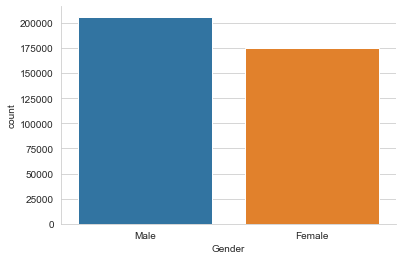

In [11]:
# plot com a contagem dos clientes homens e mulheres
sns.set_style('whitegrid')
sns.countplot(x = 'Gender', data = data)
sns.despine()

In [12]:
# proporção em porcentagem para o plot anterior
data.Gender.value_counts().apply(lambda x: x/data.Gender.value_counts().sum()) * 100

Male     54.08
Female   45.92
Name: Gender, dtype: float64

#### 4.3.1.3 Interesse em Seguro de Automóvel por Gênero

Existem mais homens interessados (13,84% dentre todos os homens), proporcionalmente, no seguro de automóvel do que mulheres (10,39% dentre todas as mulheres). Mas isso não representa muita coisa, uma vez que não investigamos quantos, dentre os clientes, já possuem ou não um seguro ativo.

In [13]:
# proporção de clientes homens e mulheres que estão ou não interessado no seguro de automóvel
prop_client_response = cross_prop_tab(data = data, var1 = 'Gender', var2 = 'Response')
prop_client_response

Response,0,1
Gender,,
Female,89.61,10.39
Male,86.16,13.84


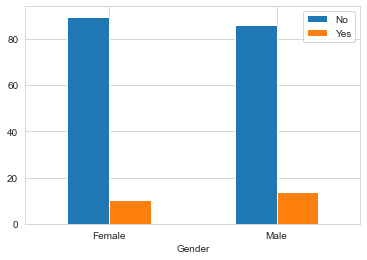

In [14]:
# plot
prop_client_response.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.legend(['No', 'Yes'])
plt.show()

#### 4.3.1.4 Seguro Ativo de Automóvel por Gênero

Proporcinalmente, há mais mulheres que possuem seguro ativo do que homens.

In [15]:
# proporção de clientes homens e mulheres que possuem o seguro de automóvel
prop_client_insu = cross_prop_tab(data = data, var1 = 'Gender', var2 = 'Previously_Insured')
prop_client_insu

Previously_Insured,0,1
Gender,,
Female,49.75,50.25
Male,57.94,42.06


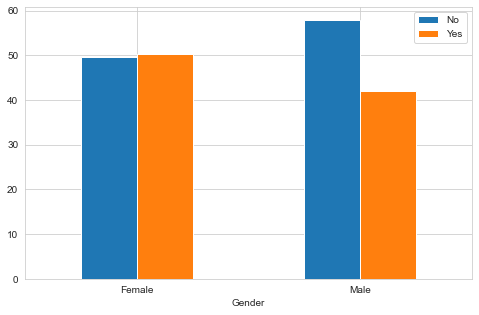

In [16]:
# plot
prop_client_insu.plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 0)
plt.legend(['No','Yes'])
plt.show()

#### 4.3.1.5 Tempo de Contrato do Seguro Saúde por Gênero

Em média, não há diferença do tempo de contratação do seguro entre homens e mulheres.

In [17]:
# gênero que está a mais tempo com o seguro
data[['Gender', 'Vintage']].groupby(['Gender']).mean()

,Vintage
Gender,
Female,154.58
Male,154.15


#### 4.3.1.6 Proporção de Interesse em Seguro de Automóvel para Quem Já Possui ou Não Seguro Ativo por Gênero

Das clientes do sexo feminino que não possuem seguro de automóvel, 20,81% possui interesse em adquirir o seguro. Já para as clientes que já possuem um seguro de automóvel ativo, praticamente todas **não** possuem interesse em um novo seguro.

In [18]:
# clientes mulheres
data_f      = data[data.Gender == 'Female']
data_f_inte = cross_prop_tab(data = data_f, var1 = 'Previously_Insured', var2 = 'Response')
data_f_inte

Response,0,1
Previously_Insured,,
0,79.19,20.81
1,99.93,0.07


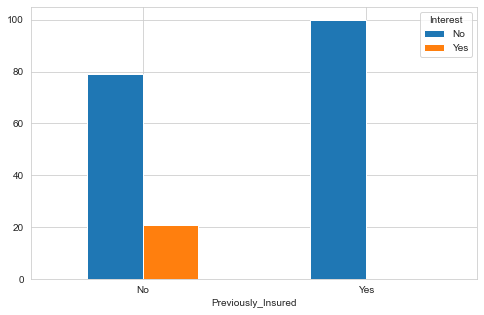

In [19]:
data_f_inte.index = ['No', 'Yes']
data_f_inte.index.names = ['Previously_Insured']
data_f_inte.plot(kind = 'bar', figsize = (8, 5))
plt.xticks(rotation = 0)
plt.legend(['No', 'Yes'], title = 'Interest')
plt.show()

Semelhante ao que aconteceu com as clientes mulheres, aconteceu com os clientes homens.

Entre os que não possuem um seguro, 23,81% possui interrese em adquirir. Para os que já possuem, praticamente todos **não** possuem interesse em um novo.

In [20]:
# clientes homens
data_m      = data[data.Gender == 'Male']
data_m_inte = cross_prop_tab(data = data_m, var1 = 'Previously_Insured', var2 = 'Response')

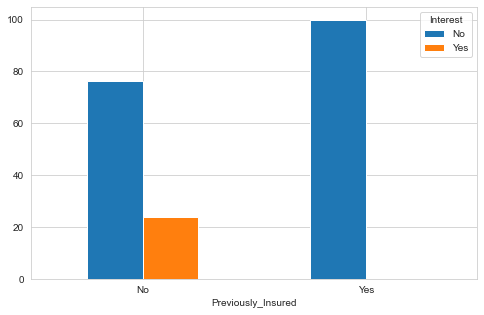

In [21]:
data_m_inte.index = ['No', 'Yes']
data_m_inte.index.names = ['Previously_Insured']
data_m_inte.plot(kind = 'bar', figsize = (8, 5))
plt.xticks(rotation = 0)
plt.legend(['No', 'Yes'], title = 'Interest')
plt.show()

- Em média, os homens que não possui seguro de automóvel ativo tem um leve interesse maior em possuir um seguro do que as mulheres.

#### 4.3.1.7 Gastos Médio com Seguro de Saúde por Gênero

In [22]:
# estatísticas
stats_male   = pd.DataFrame(data[data.Gender == 'Male']['Annual_Premium'].describe())
stats_female = pd.DataFrame(data[data.Gender == 'Female']['Annual_Premium'].describe())

# juntando as estatísticas
stats_gender         = pd.concat([stats_male, stats_female], axis = 1)
stats_gender.columns = ['Male', 'Female']

# imprimindo o resultado
stats_gender

,Male,Female
count,206089.00,175020.00
mean,30622.65,30495.79
std,17472.00,16903.07
min,2630.00,2630.00
25%,24354.00,24445.00
50%,31986.00,31322.00
75%,39810.00,38909.25
max,540165.00,540165.00


### 4.3.2 Age

#### 4.3.2.1 Faixa Etária por Gênero

A faixa etária, tanto para homens quanto para mulheres, que mais possuem seguro de saúde está entre os 20 e 30 anos.

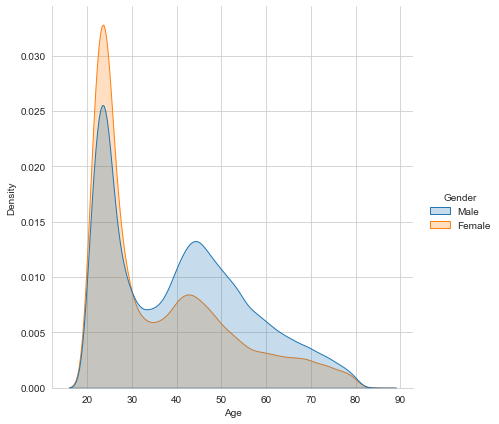

In [23]:
sns.displot(x = 'Age', hue = 'Gender', kind = 'kde', fill = True, data = data, height = 6)
plt.show()

#### 4.3.2.2 Faixa Etária e Seguro de Automóvel Ativo por Gênero

In [24]:
# criando uma nova coluna para transformar os dados numéricos da variável 'age' em variável categórica
bins                  = np.linspace(min(data.Age), max(data.Age), 5)
data_age              = data.copy()
data_age['Age_Range'] = pd.cut(data_age.Age, bins, include_lowest = True)
data_age.Age_Range.head()

0      (36.25, 52.5]
1      (68.75, 85.0]
2      (36.25, 52.5]
3    (19.999, 36.25]
4    (19.999, 36.25]
Name: Age_Range, dtype: category
Categories (4, interval[float64]): [(19.999, 36.25] < (36.25, 52.5] < (52.5, 68.75] < (68.75, 85.0]]

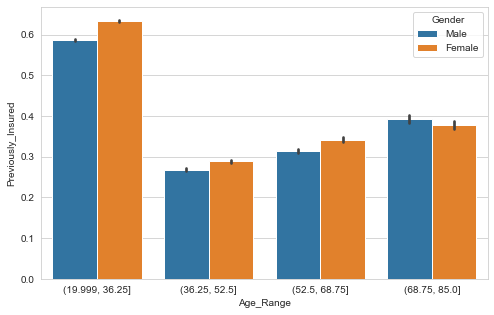

In [25]:
# plot
plt.figure(figsize = (8,5))
sns.barplot(x = 'Age_Range', y = 'Previously_Insured', hue = 'Gender', data = data_age)
plt.show()

- Para todas as faixas etárias, exceto a última, existem mais mulheres, proporcionalmente, que possuem seguro ativo de automóvel do que os homens.
- A faixa etária que mais possui, proporcionalmente, seguro ativo de automóvel é a entre 20 e 36 anos.
- A faixa etária que menos possui, proporcionalmente, seguro ativo de automóvel é entre 36 e 52 anos.

#### 4.3.2.2 Faixa Etária por Interesse em Seguro de Automóvel e Gênero

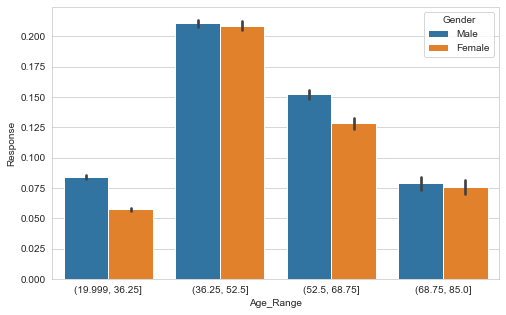

In [26]:
# plot
plt.figure(figsize = (8,5))
sns.barplot(x = 'Age_Range', y = 'Response', hue = 'Gender', data = data_age)
plt.show()

- Proporcionalmente, homens, em todas as faixas etárias, possuem em média mais interesse em adiquirir um seguro de automóveis. Isso **pode** ser explicado pelo fato de existirem mais mulheres que já possui o serviço.
- A faixa etária com meior interesse é a de 36 a 52 anos.
- Esse gráfico pode não ser muito interessante pois, este gráfico consta dados dos cliente que já possuem um seguro ativo e o também os que não possuem.

#### 4.3.2.3 Gasto Médio com Seguro Saúde por Faixa Etária

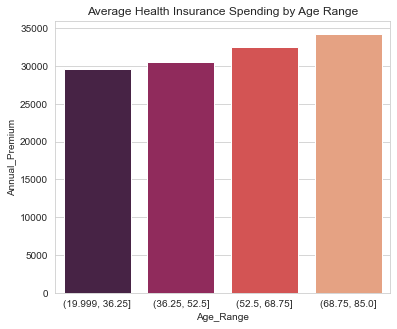

In [27]:
# agrupando as faixas estárias pelas médias
ap_age_range = data_age[['Age_Range', 'Annual_Premium']].groupby(['Age_Range'], as_index = False).mean()

# plot
plt.figure(figsize = (6,5))
sns.barplot(x = 'Age_Range', y = 'Annual_Premium', data = ap_age_range, palette = 'rocket')
plt.title('Average Health Insurance Spending by Age Range')
plt.show()

Os dados mostram que, conforme a idade avança, gasta-se mais com o seguro de saúde.

### 4.3.3 Region Code

#### 4.3.3.1 Cinco Maiores Regiões em Número de Clientes

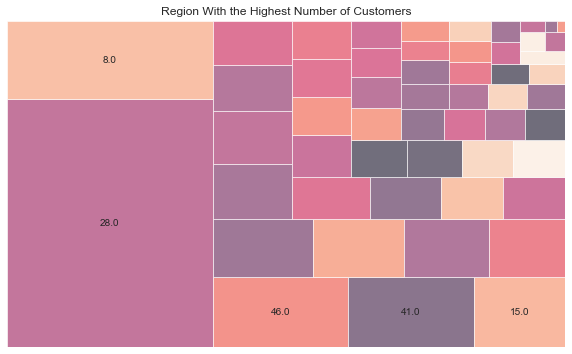

In [28]:
# plot das regiões com maior número de clientes

# tamanho das regiões e lista com as cinco regiões com maior número de clientes
sizes = data.Region_Code.value_counts()
head  = [str(i) for i in data.Region_Code.value_counts().index[:5]][:5] 

# plot
plt.figure(figsize = (10,6))
squarify.plot(sizes = sizes, label = head, alpha = .6)
plt.title('Region With the Highest Number of Customers')
plt.axis('off')
plt.show()

A região **28** é a região que possui a maior de clientes, seguidos pelas regiões **8, 46, 41 e 15**.

#### 4.3.3.2 Região com Maior Interesse em Seguro de Automóvel

In [29]:
# dataset com as cinco maiores regiões em número absoluto de clientes interessados no seguro de automóvel
data_region_abs  = pd.crosstab(data.Region_Code, data.Response).reset_index().sort_values(by=1, ascending=False)[:5]

# dataset com as cinco maiores regiões, proporcionalmente, de clientes interessados no seguro de automóvel
data_region_prop = cross_prop_tab(data, 'Region_Code', 'Response').reset_index().sort_values(by=1, ascending = False)[:5]

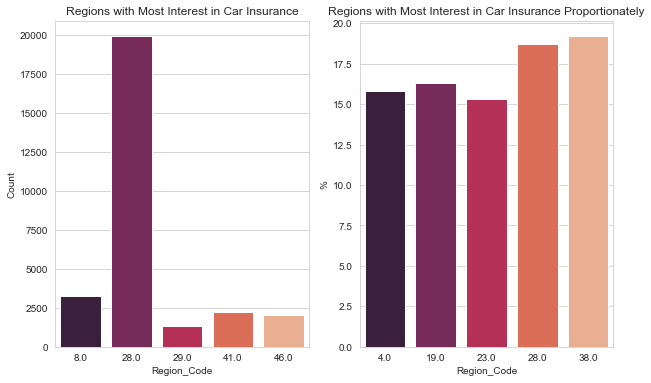

In [30]:
# plot
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.barplot(x = 'Region_Code', y = 1, data = data_region_abs, palette = 'rocket')
plt.title('Regions with Most Interest in Car Insurance')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(x = 'Region_Code', y = 1, data = data_region_prop, palette = 'rocket')
plt.title('Regions with Most Interest in Car Insurance Proportionately')
plt.ylabel('%')

plt.show()

A região **28** parece ser uma região muito importante para a empresa. É a região que possui maior número de clientes, que possue, disparado, o maior número de clientes interessados no novo seguro de automóvel, e também é a segunda região, proporcionalmente, que possui o maior número de clientes com interesse no novo seguro.

#### 4.3.3.3 Gasto Médio com Seguro de Saúde por Região

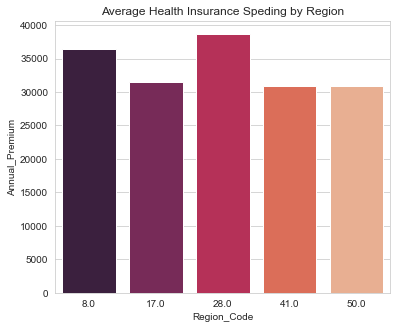

In [31]:
# agrupamento pela média por região
ap_region = data[['Region_Code', 'Annual_Premium']].groupby(['Region_Code'], as_index = False).mean()
ap_region = ap_region.sort_values(by = 'Annual_Premium', ascending = False)[:5]
ap_region

# plot
plt.figure(figsize = (6,5))
sns.barplot(x = 'Region_Code', y = 'Annual_Premium', data = ap_region, palette = 'rocket')
plt.title('Average Health Insurance Speding by Region')
plt.show()

### 4.3.4 Vehicle Damage

#### 4.3.4.1 Hipótese

Vamos avaliar se há uma associação significativa entre o automóvel do cliente ter sido danificado no passado e ele possuir interesse em adquirir o seguro.

Para isso, novamente utilizaremos o Chi-square Test of Independence. Sendo que:

- Hipótese nula: não existe associação significativa entre as variáveis.
- Hipótese alternativa: existe associação significativa entre as variáveis.

In [32]:
# tabela de frequências
crosstable_vd = pd.crosstab(data.Vehicle_Damage, data.Response, margins = True)

# gravando os valores em um array
obs_vd        = np.array([crosstable_vd.iloc[0].values, crosstable_vd.iloc[1].values])

# teste de X²
stats.chi2_contingency(obs_vd)[0:3]

(47866.92327853048, 0.0, 2)

O p-value está muito próximo de 0, então temos p-value < 0.05, e isso significa que podemos rejeitar a hipótese nula, ou seja, existe associação significativa entre o cliente já ter danificado o automóvel no passado e ele possuir interesse no seguro.

In [33]:
# tabela de frequências
crosstable_vd

Response,0,1,All
Vehicle_Damage,,,
No,187714,982,188696
Yes,146685,45728,192413
All,334399,46710,381109


A tabela de frequência mostra que há muito mais casos de clientes que já tiveram seus automóveis danificados com interesse do que clientes que não tiveram seus carros danificados com interesse, mesmo que o total de clientes que tiveram seus automóveis danificados seja menor. Proporcionamente, a tabela fica da seguinte forma:

In [34]:
# a mesma tabela anterior em porcentagem
cross_prop_tab(data, 'Vehicle_Damage', 'Response')

Response,0,1
Vehicle_Damage,,
No,99.48,0.52
Yes,76.23,23.77


# 5.0 Pré-processamento

## 5.1 Remoção de Variáveis

Vamos iniciar o pré-processamento removendo as colunas que de cara não representa nenhuma informação relevante para a construção do modelo de machine learning. 

- A coluna "id" não traz nenhuma informação relevante;
- Tendo em vista as estatísticas da coluna 'Driving_License', onde o desvio padrão é extremamente pequeno (bem próximo de 0), isso pode nos indicar que os valores contidos nas observações não sofre alterações, o que é provado a seguir.

In [35]:
# valores da coluna 'Driving_license'
data.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [36]:
# colunas a serem excluídas
col_del = ['id', 'Driving_License', 'Response']

# colunas
columns = data.columns.tolist()
columns = [c for c in columns if c not in col_del]
columns

['Gender',
 'Age',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [37]:
# remoção
train        = data[columns]
train_target = data['Response']

test  = test[columns]

print(train.shape, test.shape)

(381109, 9) (127037, 9)


In [38]:
# imprimindo o dataset
train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,28.00,0,> 2 Years,Yes,40454.00,26.00,217
1,Male,76,3.00,0,1-2 Year,No,33536.00,26.00,183
2,Male,47,28.00,0,> 2 Years,Yes,38294.00,26.00,27
3,Male,21,11.00,1,< 1 Year,No,28619.00,152.00,203
4,Female,29,41.00,1,< 1 Year,No,27496.00,152.00,39


## 5.2 Transformações

### 5.2.1 Tipos

É preciso transformar as colunas que contém valores string para valores inteiros.

In [39]:
# gender
train.Gender = train.Gender.map({'Male' : 1, 'Female' : 0})
test.Gender  = test.Gender.map({'Male' : 1, 'Female' : 0})

# vehicle age
train.Vehicle_Age = train.Vehicle_Age.astype('category').cat.codes
test.Vehicle_Age  = test.Vehicle_Age.astype('category').cat.codes

# vehicle damage
train.Vehicle_Damage = train.Vehicle_Damage.map({'Yes' : 1, 'No' : 0})
test.Vehicle_Damage  = test.Vehicle_Damage.map({'Yes' : 1, 'No' : 0})

In [40]:
# imprimindo o resultado
train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,28.00,0,2,1,40454.00,26.00,217
1,1,76,3.00,0,0,0,33536.00,26.00,183
2,1,47,28.00,0,2,1,38294.00,26.00,27
3,1,21,11.00,1,1,0,28619.00,152.00,203
4,0,29,41.00,1,1,0,27496.00,152.00,39


### 5.2.2 Distribuição

Alterando o tipo de distribuição das variáveis numéricas continuas (Age, Annual Premium e Vintage).

In [41]:
# instanciando a função para normalizar os dados
ss = StandardScaler()

# variáveis numéricas
num_var = ['Age', 'Annual_Premium', 'Vintage']

# alterando o tipo da distribuição
for col in num_var:
    
    train[col] = ss.fit_transform(train[col].values.reshape(-1, 1))
    test[col]  = ss.fit_transform(test[col].values.reshape(-1, 1))

# imprimindo o resultado
train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.33,28.00,0,2,1,0.57,26.00,0.75
1,1,2.40,3.00,0,0,0,0.17,26.00,0.34
2,1,0.53,28.00,0,2,1,0.45,26.00,-1.52
3,1,-1.15,11.00,1,1,0,-0.11,152.00,0.58
4,0,-0.63,41.00,1,1,0,-0.18,152.00,-1.38


In [42]:
# verificando a normalização
train[num_var].describe()

,Age,Annual_Premium,Vintage
count,381109.00,381109.00,381109.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.21,-1.62,-1.73
25%,-0.89,-0.36,-0.86
50%,-0.18,0.06,-0.00
75%,0.66,0.51,0.87
max,2.98,29.61,1.73


## 5.3 Variável Target

Verificando a distribuição da variável target no dataset de treino.

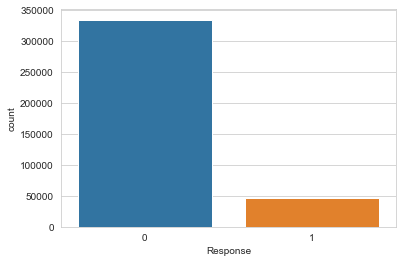

In [43]:
# distribuição da variável target
target_plot = pd.DataFrame(train_target)
sns.countplot(x = 'Response', data = target_plot)
plt.show()

O dataset encontra-se desbalanceado, talvez será preciso balanceá-lo para obtermos uma performance melhor do modelo.

# 5.4 Feature Selection

Com o intuito de gerar um modelo mais simples e o mais generalizável possível, será feito uma seleção de atributos. Definindo assim, os atributos que melhor explicam o modelo.

Para isso, será utilizado o Random Forest que conta com um atributo chamado 'feature_importances_', que calcula o grau de redução de impureza para cada feature do dataset.

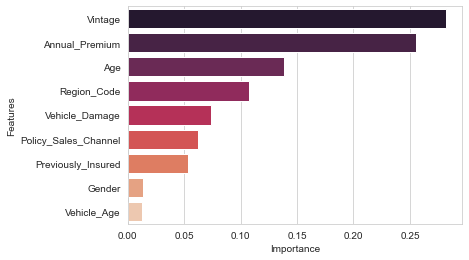

In [44]:
# instanciando o modelo
model_fs = RandomForestClassifier(n_jobs = -1)

# treinamento
model_fs.fit(train, train_target)

# feature importances
feature_importances = pd.DataFrame({'Features' : columns, 
                                    'Importance' : model_fs.feature_importances_}).sort_values('Importance', ascending = False)

# plot
sns.barplot(x = 'Importance', y = 'Features', data = feature_importances, orient = 'h', palette = 'rocket')
plt.show()

Vou excluir os features com score menor que 0.05. 

In [45]:
# captando as features selecionadas
columns_selections = feature_importances['Features'].to_list()[:-2]
columns_selections

['Vintage',
 'Annual_Premium',
 'Age',
 'Region_Code',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 'Previously_Insured']

# 6.0 Construção do Modelo

O objetivo agora é selecionar o melhor algortimo, para isso, vamos utilizar 5 algoritmos de classificação diferentes.

## 6.1 Verificando a Necessidade de Balanceamento dos Dados

Irei construir um modelo para verificar se este está aprendendo prever ambas as classes. Para isso, utilizarei o Random Forest, com todos os parâmetros default.

Accuracy:  0.8645928996877542


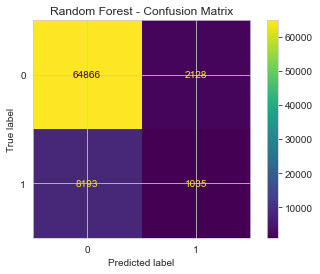

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66994
           1       0.33      0.11      0.17      9228

    accuracy                           0.86     76222
   macro avg       0.61      0.54      0.55     76222
weighted avg       0.82      0.86      0.83     76222



In [46]:
# separar o dataset em treino e teste
x_train, x_test, y_train, y_test = train_test_split(train[columns_selections], train_target, test_size = 0.2)

# treinamento
clf = RandomForestClassifier().fit(x_train, y_train)

# acurácia
print('Accuracy: ', accuracy_score(y_test, clf.predict(x_test)))

# confusion matrix
con_mtx(clf, clf_name = 'Random Forest - Confusion Matrix', x = x_test, y = y_test)

# classification report
print(classification_report(y_test, clf.predict(x_test)))

O modelo não é bom em prever se o cliente tem interesse no seguro de automóvel. Tendo isso em vista, irei balancear o dataset de treino e verificar se existe melhora. 

### 6.1.1 Oversample

Fazendo o balanceamento utilizando Synthetic Minority Oversampling Technique (SMOTE), que cria novos dados para a classe minoritária. 

In [47]:
# fazendo o oversample
x_train_over, y_train_over = SMOTE().fit_resample(x_train, y_train)

# imprimindo o resultado
y_train_over.value_counts()

1    267405
0    267405
Name: Response, dtype: int64

Accuracy:  0.8174673978641337


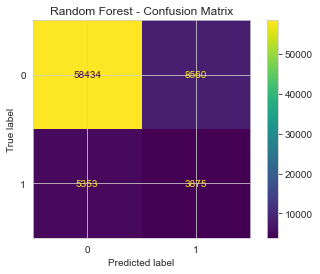

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     66994
           1       0.31      0.42      0.36      9228

    accuracy                           0.82     76222
   macro avg       0.61      0.65      0.63     76222
weighted avg       0.84      0.82      0.83     76222



In [48]:
# treinamento com os dados com oversample
# treinamento
clf = RandomForestClassifier().fit(x_train_over, y_train_over)

# acurácia
print('Accuracy: ', accuracy_score(y_test, clf.predict(x_test)))

# confusion matrix
con_mtx(clf, clf_name = 'Random Forest - Confusion Matrix', x = x_test, y = y_test)

# classification report
print(classification_report(y_test, clf.predict(x_test)))

### 6.1.2 Undersample

Irei fazer também o balanceamento com Undersample, que consiste em reduzir a classe maioritária.

In [49]:
# undersample
x_train_under, y_train_under = RandomUnderSampler().fit_resample(x_train, y_train)

# verificando o balanceamento
y_train_under.value_counts()

1    37482
0    37482
Name: Response, dtype: int64

Accuracy:  0.7096507569992916


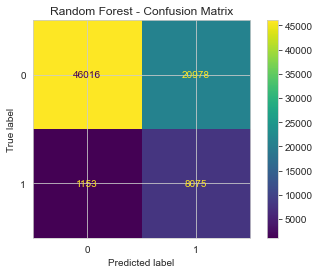

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66994
           1       0.28      0.88      0.42      9228

    accuracy                           0.71     76222
   macro avg       0.63      0.78      0.61     76222
weighted avg       0.89      0.71      0.76     76222



In [50]:
# treinamento com os dados com under sample
# treinamento
clf = RandomForestClassifier().fit(x_train_under, y_train_under)

# acurácia
print('Accuracy: ', accuracy_score(y_test, clf.predict(x_test)))

# confusion matrix
con_mtx(clf, clf_name = 'Random Forest - Confusion Matrix', x = x_test, y = y_test)

# classification report
print(classification_report(y_test, clf.predict(x_test)))

### 6.1.3 Combinando Oversample e Undersample

A combinação será feita primeiramente com oversample, para que a classe minoritária seja equivalente a 30% da classe maioritária, e undersample, para que a classe minoritária seja equivalente a 50% da classe maioritária.

In [51]:
# fazendo o oversample
x_train_ou, y_train_ou = SMOTE(sampling_strategy = 0.3).fit_resample(x_train, y_train)
x_train_ou, y_train_ou = RandomUnderSampler(sampling_strategy = 0.5).fit_resample(x_train_ou, y_train_ou)

# imprimindo o resultado
y_train_ou.value_counts()

0    160442
1     80221
Name: Response, dtype: int64

Accuracy:  0.8180708981658839


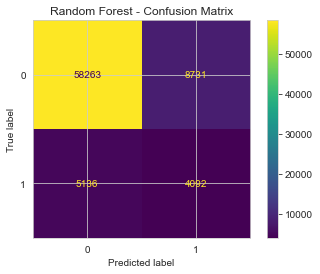

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     66994
           1       0.32      0.44      0.37      9228

    accuracy                           0.82     76222
   macro avg       0.62      0.66      0.63     76222
weighted avg       0.85      0.82      0.83     76222



In [52]:
# treinamento
clf = RandomForestClassifier().fit(x_train_ou, y_train_ou)

# acurácia
print('Accuracy: ', accuracy_score(y_test, clf.predict(x_test)))

# confusion matrix
con_mtx(clf, clf_name = 'Random Forest - Confusion Matrix', x = x_test, y = y_test)

# classification report
print(classification_report(y_test, clf.predict(x_test)))

### 6.1.4 Conclusões

Os dados que receberam o **undersample** foi o que obteve a pior acurácia entre todos (71%) porém, foi o que conseguiu captar mais clientes com possuem interesse no seguro (88%) com uma precisão de 28,4%.

Os dados **sem balanceamento** foi o que obteve a maior acurácia (86%) porém, só conseguiu prever 11% dos clientes que realmente tinham interesse com uma precisão de 35,5%.

Para o nosso problema de negócio poderíamos optar por duas abordagens: 
- 1ª: maior precisão em prever os clientes que realmente possuem interesse;
- 2ª: captar o maior número de clientes com interesse.

Em um cenário onde há recursos limitados para contatar os clientes oferecê-los o seguro, um modelo com precision maior é o mais recomendado. Já em um cenário onde há mais recursos para contatar a maior quantidade de clientes possível, um modelo com recall maior é o mais recomendado.

Partindo do presuposto que a Insurance All quer converter a maior quantidade de clientes interessados na contratação do seguro, optarei pelo modelo com os dados balanceados com undersample.

## 6.2 Escolha do Algoritmo

Vou testar 5 algoritmos diferentes e escolher o que obtiver o maior valor de recall.

In [53]:
# lista com algoritmos
models = []

models.append(('RF',  RandomForestClassifier(n_jobs = -1)))
models.append(('LR',  LogisticRegression(n_jobs = -1)))
models.append(('KNN', KNeighborsClassifier(n_jobs = -1)))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier(n_jobs = -1)))

In [54]:
# treinamento
model_choice(models = models, x_train = x_train_under, x_test = x_test, y_train = y_train_under, y_test = y_test)


RF - Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.68      0.81     66994
           1       0.28      0.88      0.42      9228

    accuracy                           0.71     76222
   macro avg       0.63      0.78      0.61     76222
weighted avg       0.89      0.71      0.76     76222


LR - Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     66994
           1       0.25      0.98      0.39      9228

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222


KNN - Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.67      0.79     66994
           1       0.26      0.84      0.40      9228

    accuracy                           0.69     76222
   macro avg       0.62      0.76    

SVM e Logistic Regression obtiveram o mesmo recall, porém, Logistic Regression o fez com maior precision. Portanto, o algoritmo que iremos utilizar para a construção do modelo é o Logistic Regression.

## 6.3 Otimização dos Algoritmos

Vou utilizar a função Randomized Search do Sklearn em busca dos melhores parâmetros (apenas alguns serão testados).

In [55]:
# hiperparâmetros a serem otimizados
hyper_lr  = {'penalty' : ['l1', 'l2'],
             'C'       : np.logspace(-4, 4, 20),
             'solver'  : ['lbfgs', 'liblinear']}

# modelo
clf_lr = LogisticRegression(n_jobs = -1)

# otimizando
random_search = RandomizedSearchCV(clf_lr, param_distributions = hyper_lr, cv = 5, n_jobs = -1, scoring = 'recall')
random_search.fit(x_train_under, y_train_under)

# melhores parâmetros
bestclf_lr = random_search.best_estimator_

# resultado
print('Optimized Model:\n', classification_report(y_test, bestclf_lr.predict(x_test)))

Optimized Model:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74     66994
           1       0.25      0.98      0.39      9228

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



Não foi possível, a partir da tentativa com RandomizedSearchCV, otimizar o algortimo com os parâmetros passados. Portanto, usarei os padrões default, conforme feito anteriormente.

## 6.4 Modelo Final

Enfim, utilizarei o algoritmo Logistic Regression com os dados com undersample para o treinamento do modelo final.

In [56]:
# dados para treino
x = train[columns_selections]
y = train_target

# undersample com todos os dados de treino
x, y = RandomUnderSampler().fit_resample(x, y)

# verificando o balanceamento
print('Shape:\nx: {}\ny: {}\n'.format(x.shape, y.shape))
print('Balancing:\n{}'.format(y.value_counts()))

Shape:
x: (93420, 7)
y: (93420,)

Balancing:
1    46710
0    46710
Name: Response, dtype: int64


In [57]:
# modelo final
final_model = LogisticRegression(n_jobs = -1).fit(x, y)

In [58]:
# salvando o modelo
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

# 7.0 Realizando as Previsões

In [59]:
# carregando o modelo
loaded_model = pickle.load(open(filename, 'rb'))

In [60]:
# realizando as previsões
predictions = loaded_model.predict(test[columns_selections])

# carregando o dataset de test 'bruto'
test_pred   = pd.read_csv('test.csv')

# unindo as previsões em um dataset
test_pred['Predictions'] = predictions
test_pred = test_pred.sort_values(by = 'Predictions', ascending = False)

# resultado
test_pred.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Predictions
63518,444628,Female,64,1,28.00,0,1-2 Year,Yes,32000.00,122.00,111,1
100150,481260,Male,56,1,41.00,0,1-2 Year,Yes,25024.00,26.00,222,1
100148,481258,Female,56,1,28.00,0,1-2 Year,Yes,25360.00,124.00,298,1
51246,432356,Female,21,1,49.00,0,< 1 Year,Yes,34361.00,160.00,278,1
51245,432355,Female,22,1,6.00,0,< 1 Year,Yes,31026.00,152.00,44,1


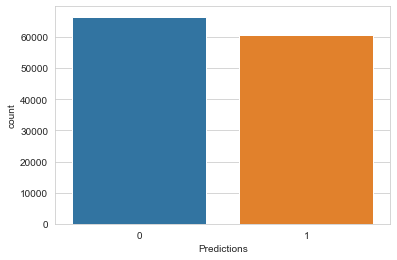

0    66500
1    60537
Name: Predictions, dtype: int64

In [61]:
# balanceamento da previsão
sns.countplot(x = 'Predictions', data = test_pred)
plt.show()

# counts
test_pred.Predictions.value_counts()

# 8.0 Respostas do Negócio

Considerando as métricas obtidas na construção do modelo e as previsões. Temos:

- Dos 60.537 clientes que foram classificados como interessados, apenas 14.998 estão de fato intessado, ou seja, 24.77% (precision);
- Considerando o recall de 98% (ou seja, 14.998 clientes) nos dados previstos, temos no dataset 15.304 clientes com interesse.

## 8.1 Qual a porcentagem de clientes interessados em adquirir um seguro de automóvel, o time de vendas conseguirá contatar fazendo 20.000 ligações?

Considerando a precision do modelo, de 25%, com 20.000 ligações é possível contatar aproximadamente **5.000 clientes** interessados (33.33% dos clientes interessados).

## 8.2 E se a capacidade do time de vendas aumentar para 40.000 ligações, qual a porcentagem de clientes interessados em adquirir um seguro de automóvel o time de vendas conseguirá contatar?

Da mesma forma da resposta anterior, fazendo 40.000 ligações é possível contatar aproximadamente **10.000 clientes** interessados (66.67% dos clientes interessados).

## 8.3 Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?

80% representa 11.998 clientes interessados. Ou seja, é necessário realizar **48.438 ligações** para contatar 80% dos clientes interessado.